# GATHERING DATA

In [35]:
#Importing required packages
import pandas as pd
import numpy as np
import datetime as dt
import tweepy
import requests
import json
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#opening the udacity's twitter file to a dataframe
tae = pd.read_csv('twitter-archive-enhanced-2.csv')
#tae.set_index('tweet_id', inplace = True)
tae.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [37]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [38]:
#downloading the neural net predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head(2)   

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [39]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
#preparing the Twitter Scraper
from creds import *

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [41]:
df_list = []
e_list = []
tweet_id = images['tweet_id']
for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(id),'favorites': int(favorites),'retweet_count': int(retweet_count)})
    
    except:
        e_list.append(id)

In [42]:
print(df_list)

[{'tweet_id': 666020888022790149, 'favorites': 2318, 'retweet_count': 435}, {'tweet_id': 666029285002620928, 'favorites': 114, 'retweet_count': 40}, {'tweet_id': 666033412701032449, 'favorites': 102, 'retweet_count': 37}, {'tweet_id': 666044226329800704, 'favorites': 251, 'retweet_count': 118}, {'tweet_id': 666049248165822465, 'favorites': 91, 'retweet_count': 37}, {'tweet_id': 666050758794694657, 'favorites': 117, 'retweet_count': 50}, {'tweet_id': 666051853826850816, 'favorites': 1055, 'retweet_count': 725}, {'tweet_id': 666055525042405380, 'favorites': 382, 'retweet_count': 201}, {'tweet_id': 666057090499244032, 'favorites': 256, 'retweet_count': 114}, {'tweet_id': 666058600524156928, 'favorites': 100, 'retweet_count': 49}, {'tweet_id': 666063827256086533, 'favorites': 415, 'retweet_count': 184}, {'tweet_id': 666071193221509120, 'favorites': 129, 'retweet_count': 51}, {'tweet_id': 666073100786774016, 'favorites': 278, 'retweet_count': 136}, {'tweet_id': 666082916733198337, 'favorite

In [43]:
len(df_list)

2057

In [44]:
e_list

[680055455951884288,
 754011816964026368,
 757597904299253760,
 759566828574212096,
 759923798737051648,
 771004394259247104,
 779123168116150273,
 802247111496568832,
 829374341691346946,
 837012587749474308,
 837366284874571778,
 842892208864923648,
 844704788403113984,
 851953902622658560,
 861769973181624320,
 872261713294495745,
 873697596434513921,
 888202515573088257]

In [45]:
#rechecking the error list
e2_list = []
for e in e_list:
    try:
        page = api.get_status(e)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
        
    except Exception:
        e2_list.append(id)

In [46]:
print (e2_list)

[892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193, 892420643555336193]


In [47]:
#parsing json data and converting it to csv format
jsondf = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
jsondf.to_csv('tweet_json.txt', encoding = 'utf-8', index = False)

In [64]:
jsondf = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
#jsondf.set_index('tweet_id', inplace = True)
jsondf.tail(4)

,tweet_id,favorites,retweet_count
2053,891689557279858688,37665,7378
2054,891815181378084864,22487,3551
2055,892177421306343426,29874,5384
2056,892420643555336193,34450,7160


In [65]:
jsondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
tweet_id         2057 non-null int64
favorites        2057 non-null int64
retweet_count    2057 non-null int64
dtypes: int64(3)
memory usage: 48.3 KB


In [66]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# ASSESSING DATA

In [67]:
# Programmatical sampling on each of the dataframes
tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2073,670995969505435648,NaN,NaN,2015-11-29 16:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670995969...,12,10,None,None,None,None,None
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
885,760153949710192640,NaN,NaN,2016-08-01 16:43:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @hownottodraw: The story/person behind @dog...,7.601538e+17,195036846.0,2016-08-01 16:42:51 +0000,"https://weratedogs.com/pages/about-us,https://...",11,10,None,None,None,None,None
1607,685663452032069632,NaN,NaN,2016-01-09 03:24:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brooks. He's confused by the almighty bal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685663452...,12,10,Brooks,None,None,None,None
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None


In [68]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874,True,Labrador_retriever,0.015920,True,doormat,0.010615,False
366,672902681409806336,https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg,1,ram,0.374466,False,bighorn,0.159621,False,Arabian_camel,0.111919,False
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True
976,707021089608753152,https://pbs.twimg.com/media/Cc_XtkRW8AEE7Fn.jpg,2,cocker_spaniel,0.559658,True,golden_retriever,0.314673,True,Pekinese,0.066672,True
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False
1865,843235543001513987,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,1,Pembroke,0.958452,True,Cardigan,0.023770,True,Chihuahua,0.005269,True
667,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False


In [69]:
jsondf.sample(10)

,tweet_id,favorites,retweet_count
1912,857746408056729600,31458,9545
159,668892474547511297,364,132
141,668567822092664832,210,49
612,680145970311643136,3409,1614
228,670385711116361728,509,184
981,707387676719185920,3303,1185
1003,708845821941387268,2801,834
1872,847842811428974592,5117,1216
1418,772152991789019136,3670,1079
1027,710997087345876993,4313,1290


In [70]:
tae.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Toby           7
Buddy          7
an             7
Daisy          7
Milo           6
Leo            6
Koda           6
Scout          6
Bella          6
Dave           6
Stanley        6
Jax            6
Rusty          6
Oscar          6
Jack           6
Gus            5
            ... 
Willie         1
Laela          1
Harnold        1
O              1
Lorelei        1
Jameson        1
Sprout         1
Antony         1
Mingus         1
Taco           1
Eriq           1
Bluebert       1
Stu            1
Ulysses        1
Wafer          1
Ralphé         1
Jessifer       1
Bertson        1
Noah           1
Crimson        1
Alf            1
Brockly        1
Jersey         1
Tassy          1
Ralphie        1
Hubertson      1
Joey           1
Comet         

In [71]:
tae.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [72]:
tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [73]:
tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## CLEANING THE DATA

In [74]:
# Creat a copy of the original 3 datasets for reference
archive_clean_df = tae.copy()
images_clean_df = images.copy()
json_clean_df = jsondf.copy() 

In [75]:
# Save a copy of the clean datasets to work with
archive_clean_df.to_csv('archive_clean.csv',encoding='utf-8',index=False)
images_clean_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
json_clean_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [76]:
# Load clean datasets
archive_clean_df = pd.read_csv('archive_clean.csv')
images_clean_df = pd.read_csv('image_clean.csv')
json_clean_df = pd.read_csv('json_clean.csv')

In [77]:
archive_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [78]:
json_clean_df.head()

,tweet_id,favorites,retweet_count
0,666020888022790149,2318,435
1,666029285002620928,114,40
2,666033412701032449,102,37
3,666044226329800704,251,118
4,666049248165822465,91,37


### DATA TIDINESS ISSUE : 1

In [79]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
archive_master_df = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id','tweet_id'],how='left')

In [80]:
archive_master_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,34450.0,7160.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29874.0,5384.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,22487.0,3551.0


In [81]:
# Merge new master with image_clean
archive_master_df = pd.merge(archive_master_df, images_clean_df, on='tweet_id',how='left') 

In [82]:
archive_master_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [83]:
archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     20

In [84]:
# Saving a copy of the newly created master dataframe before cleaning
archive_master_df.to_csv('archive_master.csv',encoding='utf-8',index=False)

In [85]:
df = pd.read_csv('archive_master.csv') 

### DATA QUALITY ISSUE : 1 
#### Removing tweets without image

In [86]:
df = df[df.jpg_url.notnull()]

In [87]:
# Check that we have an image for each tweet_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
favorites                     2057 

### DATA QUALITY ISSUE : 2 
####   Removing  Retweets and Replies

In [88]:
# there are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
df = df[df.retweeted_status_id.isnull()]

In [89]:
# check retweets have gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
favorites                     1986 non

In [90]:
# delete the columns related to retweets from the master dataframe.
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [91]:
# checking whether the retweet columns are removed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
favorites                1986 non-null float64
retweet_count            1986 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf              

In [92]:
# Checking the dataframe
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [93]:
# deleting the columns related to replies from the master dataframe.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorites             1986 non-null float64
retweet_count         1986 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-n

In [95]:
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### DATA TIDINESS ISSUE : 2 
#### Combining the 4 categorical dog types 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_type'

In [96]:
#lets condense the 'dog type' columns into one
dog_type = []

string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_type.append(string_out[string_in.index(word)])
            break
    else:
        dog_type.append('None')

df['dog_type'] = dog_type
df['dog_type'].value_counts()

None       1625
pupper      237
doggo        69
floofer      34
puppo        29
Name: dog_type, dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorites             1986 non-null float64
retweet_count         1986 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-n

In [98]:
#dropping the 4 coulmns they were combined to one
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [99]:
list(df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_type']

In [100]:
#we wont be needing the soure URL also
del df['source']

In [101]:
list(df)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_type']

### DATA TIDINESS ISSUE : 3
####  Condensing the dog breed prediction columns, by considering only the 1st and best prediction. This helps us to analyse better and easier.

In [102]:
# next let's combine the dog breed analysis
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      
    # this isn't about the parsing AI so the rest of this data is deletable

df.apply(breed_confidence, axis=1)
df['breed'] = breed
df['confidence'] = confidence
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,34450.0,7160.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,None,Unidentifiable,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,29874.0,5384.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,22487.0,3551.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,37665.0,7378.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,35981.0,7918.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,basset,0.555712


In [103]:
#dropping the unwanted columns as they were processed
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,34450.0,7160.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,None,Unidentifiable,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,29874.0,5384.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,None,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,22487.0,3551.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,None,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,37665.0,7378.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,None,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,35981.0,7918.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,None,basset,0.555712


### DATA QUALITY ISSUE : 3

In [104]:
#Converting the present timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
favorites             1986 non-null float64
retweet_count         1986 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
dog_type              1994 non-null object
breed                 1994 non-null object
confidence            1994 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 233.7+ KB


### DATA QUALITY ISSUE : 4

In [105]:
#attepmt to remove null values and useless data
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['dog_type'] == 'None', 'dog_type'] = None
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
favorites             1986 non-null float64
retweet_count         1986 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
dog_type              369 non-null object
breed                 1686 non-null object
confidence            1686 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 233.7+ KB


In [107]:
# Removing the URLS column as it cannot be used for our data analysis.
del df['expanded_urls']
del df['jpg_url']
del df['img_num']
list(df)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweet_count',
 'dog_type',
 'breed',
 'confidence']

### DATA QUALITY ISSUE : 5
####   Investigating the surprising values in rating_denominator

In [109]:
# List the different denominators
df.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [110]:
# Make available a column list for copying and pasting
df.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'favorites', 'retweet_count', 'dog_type',
       'breed', 'confidence'],
      dtype='object')

In [113]:
# Create a new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating_df = df.drop(['timestamp','name','favorites','retweet_count',
 'dog_type','breed','confidence'],axis=1)

In [114]:
# Filter new dataframe to include only denominators not equal to expected 10
rating_df = rating_df[rating_df.rating_denominator != 10]

In [115]:
# Set the column width in pandas so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)

In [125]:
rating_df

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [119]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 433 to 2335
Data columns (total 4 columns):
tweet_id              18 non-null int64
text                  18 non-null object
rating_numerator      18 non-null int64
rating_denominator    18 non-null int64
dtypes: int64(3), object(1)
memory usage: 720.0+ bytes


In [128]:
# Reading the text of Tweet_id 666287406224695296 - the correct value should be 5/10
# Change numerator and denominator rating scores in master dataframe df
df.loc[df.tweet_id == 666287406224695296, 'rating_numerator'] = 5
df.loc[df.tweet_id == 666287406224695296, 'rating_denominator'] = 10
df.loc[df.tweet_id == 682962037429899265, 'rating_numerator'] = 6
df.loc[df.tweet_id == 682962037429899265, 'rating_denominator'] = 10
df.loc[df.tweet_id == 716439118184652801, 'rating_numerator'] = 10
df.loc[df.tweet_id == 716439118184652801, 'rating_denominator'] = 10
df.loc[df.tweet_id == 810984652412424192, 'rating_numerator'] = 9
df.loc[df.tweet_id == 810984652412424192, 'rating_denominator'] = 10
df.loc[df.tweet_id == 722974582966214656, 'rating_numerator'] = 2
df.loc[df.tweet_id == 722974582966214656, 'rating_denominator'] = 10
df.loc[df.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df.loc[df.tweet_id == 722974582966214656, 'rating_denominator'] = 10
df.loc[df.tweet_id == 740373189193256964, 'rating_numerator'] = 10
df.loc[df.tweet_id == 740373189193256964, 'rating_denominator'] = 10


In [129]:
df.rating_denominator.value_counts()

10     1982
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [130]:
df.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweet_count,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,34450.0,7160.0,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,29874.0,5384.0,None,Chihuahua,0.323581


### DATA QUALITY ISSUE : 6
####   Investigating the surprising values in rating_numerator

In [131]:
df.rating_numerator.value_counts()

12      450
10      421
11      396
13      262
9       151
8        95
7        51
14       35
5        34
6        33
3        19
4        15
2         9
1         4
0         2
420       1
1776      1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [133]:
# Creating another dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating2_df = df.drop(['timestamp','name','favorites','retweet_count',
 'dog_type','breed','confidence'],axis=1)

In [134]:
# This time our expectation would be a value between 0 and 14.
# Filter the dataframe to include values outside of the above parameter.
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

In [135]:
rating2_df

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [137]:
# Reading through the others, there are some users giving decimal point evaluations. I will round these to the nearest
# whole number.
df.loc[df.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 rounded to 11 
df.loc[df.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 rounded to 10
df.loc[df.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # 11.27 rounded to 11

In [138]:
# checking whether the above changes to the rating_numerator are reflected
df.rating_numerator.value_counts()

12      450
10      422
11      398
13      262
9       151
8        95
7        51
14       35
5        34
6        33
3        19
4        15
2         9
1         4
0         2
420       1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
1776      1
Name: rating_numerator, dtype: int64

### DATA QUALITY ISSUE : 7
####   Converting each column to its most appropriate data type.

In [148]:
# Convert data types to most suitable data type and round confidence to 2 decimal places to make easier to read
df['tweet_id'] = df['tweet_id'].astype(object)
df['dog_type'] = df['dog_type'].astype('category')
df['confidence'] = df['confidence'].round(2)


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
favorites             1986 non-null float64
retweet_count         1986 non-null float64
dog_type              369 non-null category
breed                 1686 non-null object
confidence            1686 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 173.5+ KB


### DATA QUALITY ISSUE : 8
#### Rename and rearranging columns in a logical manner

In [150]:
df.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorites,retweet_count,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,34450.0,7160.0,NaN,None,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,29874.0,5384.0,NaN,Chihuahua,0.32
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,22487.0,3551.0,NaN,Chihuahua,0.72


In [151]:
# Renaming the columns for easier understanding for someone not familiar with the original data sets
df = df.rename(columns =  {'timestamp':'tweet_date',
                           'text': 'tweet_text',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorites':'no_of_likes',
                           'breed': 'dog_breed',
                           'confidence': 'probability_AI_calc'})

In [152]:
# Reorder the columns into a logical order
df = df[['tweet_id','tweet_date','tweet_text','dog_name',
           'dog_score','out_of','dog_type','dog_breed','probability_AI_calc',
          'no_of_likes','retweet_count']]

In [153]:
df

,tweet_id,tweet_date,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,13,10,NaN,None,NaN,34450.0,7160.0
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,13,10,NaN,Chihuahua,0.32,29874.0,5384.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,12,10,NaN,Chihuahua,0.72,22487.0,3551.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,13,10,NaN,Labrador_retriever,0.17,37665.0,7378.0
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,12,10,NaN,basset,0.56,35981.0,7918.0
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,13,10,NaN,Chesapeake_Bay_retriever,0.43,18153.0,2664.0
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,13,10,NaN,Appenzeller,0.34,10574.0,1708.0
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,13,10,NaN,Pomeranian,0.57,57987.0,16116.0
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,Zoey,13,10,NaN,Irish_terrier,0.49,25001.0,3694.0
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,14,10,doggo,Pembroke,0.51,28507.0,6216.0


In [154]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False) #saved

In [163]:
#matplotlib.style.use('seaborn-whitegrid')
df.set_index('tweet_date', inplace=True)

# ANALYSIS

## INSIGHT 1

Text(0,0.5,'Count')

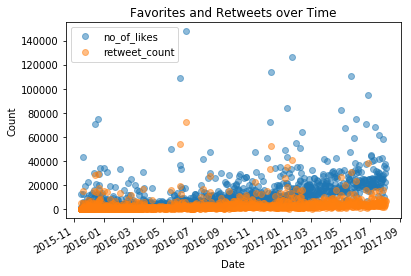

In [164]:
df[['no_of_likes', 'retweet_count']].plot(style = 'o', alpha = .5)
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')

## INSIGHT 2

Text(0,0.5,'Rating')

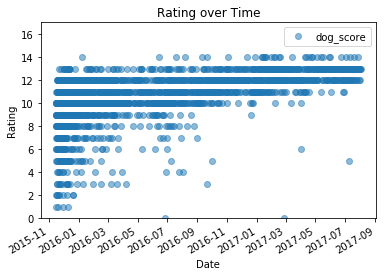

In [165]:
df.plot(y ='dog_score', ylim=[0,17], style = 'o', alpha = .5)
plt.title('Rating over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

## INSIGHT 3

In [166]:
top_breeds=df.groupby('dog_breed').filter(lambda x: len(x) >= 20)
top_breeds.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.0,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.0,13.0
Chihuahua,91.0,10.505495,2.104881,3.0,10.00,11.0,12.0,14.0
Eskimo_dog,22.0,11.409091,1.402688,9.0,10.00,12.0,12.0,14.0
French_bulldog,31.0,11.193548,1.796652,8.0,10.00,12.0,12.0,14.0
German_shepherd,21.0,11.000000,1.449138,8.0,10.00,11.0,12.0,13.0
Labrador_retriever,108.0,13.638889,16.791998,7.0,10.00,11.0,12.0,165.0
Pembroke,95.0,11.410526,1.716594,4.0,11.00,12.0,12.0,14.0
Pomeranian,42.0,10.928571,1.386219,6.0,10.00,11.0,12.0,14.0


# VISUALIZATION 

In [167]:
#visualization of the most rated breed.

Text(0,0.5,'Breed')

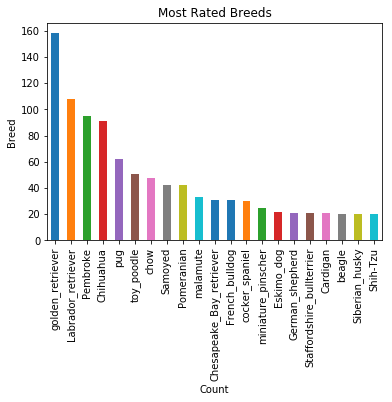

In [168]:
top_breeds['dog_breed'].value_counts().plot(kind = 'bar')
plt.title('Most Rated Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')